In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x=pd.read_csv("kerala.csv")


In [3]:
# columns_to_drop = ["Unnamed: 0"]
# data_clean = x.drop(columns_to_drop,axis = 1)
# x = data_clean


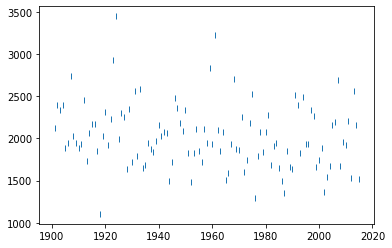

In [4]:
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'|')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#flood,rain,heavy rain
for i in range(0,len(x1)):
    if x1[i]>2300 or june[i] > 300 or sub[i] > 700:
        flood.append('1')
    elif x1[i] < 1000 or june[i] < 150 or sub[i] < 300:
        flood.append('0')
    else:
        flood.append('-1')





df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      

    SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7   51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6   57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6    3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0   32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3    9.4  105.9  263.3   850.2   520.5  293.6   
5        KERALA  1906  26.7   7.4    9.9   59.4  160.8   414.9   954.2  442.8   
6        KERALA  1907  18.8   4.8   55.7  170.8  101.4   770.9   760.4  981.5   
7        KERALA  1908   8.0  20.8   38.2  102.9  142.6   592.6   902.2  352.9   
8        KERALA  1909  54.1  11.8   61.3   93.8  473.2   704.7   782.3  258.0   
9        KERALA  1910   2.7  25.7   23.3  124.5  148.8   680.0   484.1  473.8   
10       KERALA  1911   3.0   4.3   18.2   51.0  180.6   990.0   705.3  178.6   
11       KERALA  1912   1.9 

In [6]:

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1 or -1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [8]:
Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X_test,Y_test)) 


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7931034482758621


In [9]:
np.unique(y1)

array(['-1', '0', '1'], dtype=object)

In [10]:
import pickle
Pkl_Filename = "kerala.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Lr, file)